In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import os
import pathlib as pt
import sys
import pickle 
import math as m

import pywt as wt

In [2]:
#sys.path.append(os.getcwd()+"\\ecg_data_wfdb")
home = os.path.abspath(pt.Path(os.getcwd()).parent) 
sys.path.append(home)
import use.segment.open as so


In [3]:
path="C:\\sebin\\ecg\\sample\\113_2.txt"
ecg= so.file_open(path)


In [4]:
#3 level discrete wavelet transform

In [46]:
coef = wt.wavedec(ecg['record'],'db1',level=3)


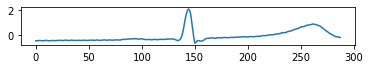

In [6]:
plt.subplot(5,1,1)
plt.plot(ecg['record'])

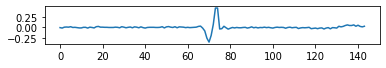

In [7]:
plt.subplot(5,1,2)
plt.plot(coef[3])

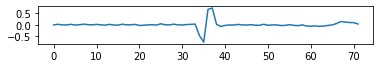

In [8]:
plt.subplot(5,1,3)
plt.plot(coef[2])


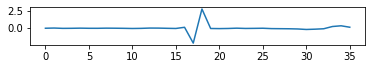

In [9]:
plt.subplot(5,1,4)
plt.plot(coef[1])

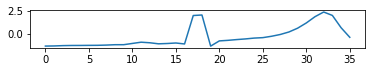

In [10]:
plt.subplot(5,1,5)
plt.plot(coef[0])

In [11]:
#idwt1:전체

In [12]:
re_mul_ecg=wt.waverec(coef,'db1')

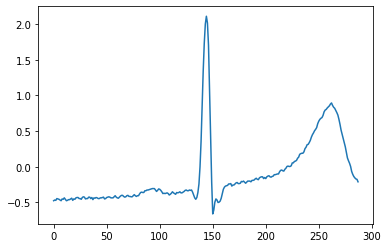

In [13]:
plt.plot(ecg['record'])

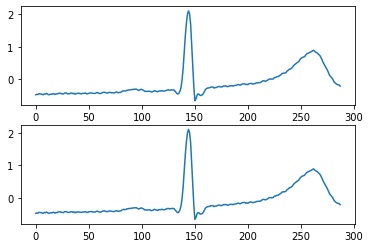

In [14]:
plt.subplot(2,1,1)
plt.plot(ecg['record'])
plt.subplot(2,1,2)
plt.plot(re_mul_ecg)

In [15]:
#idwt1실패

In [16]:
coef_2 = coef

In [17]:
coef_2[0] == np.zeros(len(coef_2[0]))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [18]:
re_sig_ecg=wt.waverec(coef_2,'db1')

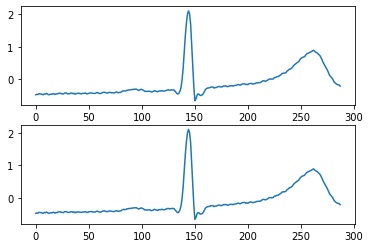

In [19]:
plt.subplot(2,1,1)
plt.plot(ecg['record'])
plt.subplot(2,1,2)
plt.plot(re_sig_ecg)

In [20]:
#idwt2:실패

In [21]:
coef_3 = coef
coef_2[0] == np.zeros_like(coef_2[0])
coef_2[1] == np.zeros_like(coef_2[1])
re_sig_ecg=wt.waverec(coef_3,'db1')

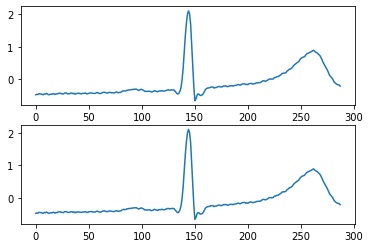

In [22]:
plt.subplot(2,1,1)
plt.plot(ecg['record'])
plt.subplot(2,1,2)
plt.plot(re_sig_ecg)

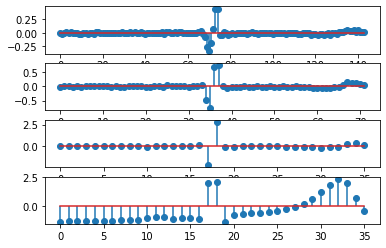

In [23]:
for i in range(len(coef)):
    plt.subplot(4,1,i+1)
    plt.stem(coef[-(i+1)])

In [24]:
threshold = round(m.sqrt(m.log(m.e,len(coef[0]))*2),4)
threshold 

0.7471

In [25]:
def threshold(coef):
    threshold = round(m.sqrt(m.log(m.e,len(coef))*2),4)
    for i in range(len(coef)):
        if coef[i]<threshold:
            coef[i]=0
    return coef

In [26]:
#idwt3:threshold (hard,sqtwolog)
#baseline drift noise removal

In [53]:
coef4 = coef
coef4[0] = threshold(coef4[0])
coef4[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 2.00818326, 2.0647518 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.20031376, 1.88090404, 2.38825315, 2.01702209, 0.        ,
       0.        ])

In [28]:
re_sig_ecg=wt.waverec(coef4,'db1')

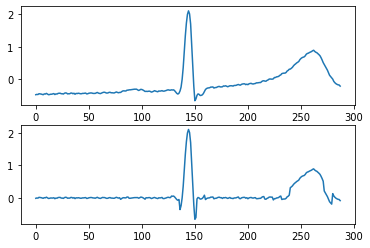

In [54]:
plt.subplot(2,1,1)
plt.plot(ecg['record'])
plt.subplot(2,1,2)
plt.plot(re_sig_ecg)

In [61]:
def test(data,level):
    co= wt.wavedec(data,'db2',level=3)

    level =level-1
    co[level]=threshold(co[level])

    re=wt.waverec(co,'db2')
    
    plt.subplot(2,1,1)
    plt.plot(ecg['record'])
    plt.subplot(2,1,2)
    plt.plot(re)

    return re
    

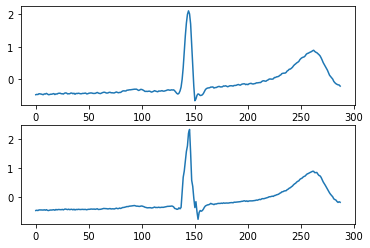

In [65]:
t=test(ecg['record'],3)